## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#Do I want to activate the following:
#%matplotlib notebook
#import sklearn.datasets as dta
#import scipy.stats as st

# Data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata
#study_results

# Combine the data into a single dataset
mousecombined_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID",  how ="outer")

# Display the data table for preview
mousecombined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
    #number of records
mousecombinedcount = mousecombined_df["Mouse ID"].count()
print("There are", mousecombinedcount, "records in the dataframe")

    #number of unique records
mousecombineduniquecount = len(mousecombined_df["Mouse ID"].unique())
print("There are", mousecombineduniquecount, "unique mouse IDs records in the dataframe")

    #determine if blank fields
mousecombined_df.count()

There are 1893 records in the dataframe
There are 249 unique mouse IDs records in the dataframe


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
    #https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/#:~:text=To%20find%20%26%20select%20the%20duplicate,argument%20is%20'first').
        #DataFrame.duplicated(subset=None, keep='first')
mouseduplicates = mousecombined_df[['Mouse ID', 'Timepoint']]
mouseduplicates = mouseduplicates[mouseduplicates.duplicated(['Mouse ID', 'Timepoint'])]
mouseduplicates

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseduplicatesfull = mousecombined_df[mousecombined_df.duplicated(['Mouse ID', 'Timepoint'])]
mouseduplicatesfull


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
    #------need to see if I can use index of duplicates dataframe to drop rows rather than list all the roles
mouseclean= mousecombined_df.drop(mousecombined_df.index[[909,911,913,915,917]])
mouseclean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
print("There are", len(mouseclean), "records in the dataframe")

#number of unique records
mousecombineduniquecount = len(mouseclean["Mouse ID"].unique())
print("There are", mousecombineduniquecount, "unique mouse IDs records in the dataframe")



There are 1888 records in the dataframe
There are 249 unique mouse IDs records in the dataframe


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
    #for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mouseregimengroup = mouseclean.groupby(["Drug Regimen"])
#mean
regimenmean = mouseregimengroup["Tumor Volume (mm3)"].mean()
regimenmean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [8]:
#median
regimenmedian = mouseregimengroup["Tumor Volume (mm3)"].median()
regimenmedian

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [9]:
#variance
regimenvar = mouseregimengroup["Tumor Volume (mm3)"].var()
regimenvar

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [10]:
#standard deviation
regimenstd = mouseregimengroup["Tumor Volume (mm3)"].std()
regimenstd 

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#SEM
regimensem = mouseregimengroup["Tumor Volume (mm3)"].sem()
regimensem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# create a dictonary 
    #data = {"students": students, 
     #       "subject": subject, 
      #      "marks": marks} 

regimendict = {"regimenmean":regimenmean,
               "regimenmedian": regimenmedian,
               "regimenvar": regimenvar,
               "regimenstd": regimenstd,
               "regimensem": regimensem
}
regimendict

{'regimenmean': Drug Regimen
 Capomulin    40.675741
 Ceftamin     52.591172
 Infubinol    52.884795
 Ketapril     55.235638
 Naftisol     54.331565
 Placebo      54.033581
 Propriva     52.393463
 Ramicane     40.216745
 Stelasyn     54.233149
 Zoniferol    53.236507
 Name: Tumor Volume (mm3), dtype: float64,
 'regimenmedian': Drug Regimen
 Capomulin    41.557809
 Ceftamin     51.776157
 Infubinol    51.820584
 Ketapril     53.698743
 Naftisol     52.509285
 Placebo      52.288934
 Propriva     50.909965
 Ramicane     40.673236
 Stelasyn     52.431737
 Zoniferol    51.818479
 Name: Tumor Volume (mm3), dtype: float64,
 'regimenvar': Drug Regimen
 Capomulin    24.947764
 Ceftamin     39.290177
 Infubinol    43.128684
 Ketapril     68.553577
 Naftisol     66.173479
 Placebo      61.168083
 Propriva     43.138803
 Ramicane     23.486704
 Stelasyn     59.450562
 Zoniferol    48.533355
 Name: Tumor Volume (mm3), dtype: float64,
 'regimenstd': Drug Regimen
 Capomulin    4.994774
 Ceftamin   

In [13]:
#df = pd.concat(data, 
#               axis = 1)
regimensummary = pd.concat(regimendict, axis=1)
Regimen_Tumor_Volume_Summary = regimensummary.rename(columns={
    "regimenmean":"Mean Tumor Volume (mm3)",
    "regimenmedian":"Median Tumor Volume (mm3)",
    "regimenvar":"Variance Tumor Volume (mm3)",
    "regimenstd":"Standard Deviation Tumor Volume (mm3)",
    "regimensem":"SEM Tumor Volume (mm3)"
})
Regimen_Tumor_Volume_Summary

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

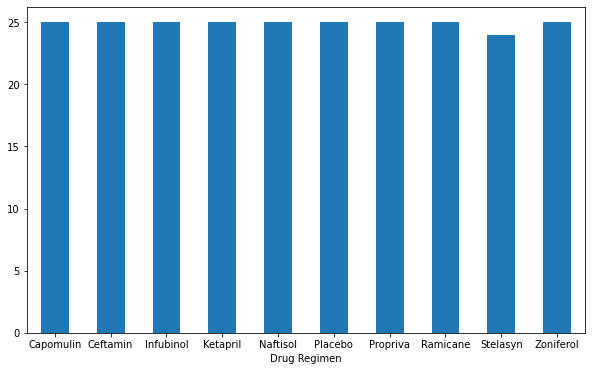

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study
    #using pandas. 
regimenmice = mouseregimengroup["Mouse ID"].nunique()

#Y axis = Regimen
regimenY = regimenmice.values.tolist()
#print(regimenY)

#X azis = number of mice
regimenX = regimenmice.index.tolist()
#print(regimenX)

#sample bar chart - plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

regimenmice.plot.bar(figsize=(10,6), width=.5, rot=0)

<BarContainer object of 10 artists>

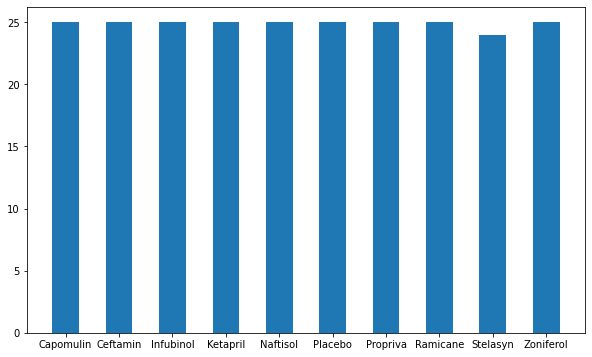

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study
    #using pyplot.

plt.figure(figsize=(10,6))
plt.bar(regimenX, regimenY, width=.5,)
#plt.show()

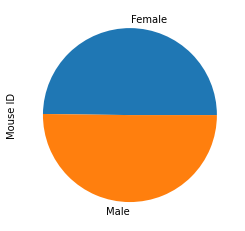

In [24]:
#Generate a pie plot using both Pandas plot
mousesexgroup = mouseclean.groupby(["Sex"])
mousesexcount = mousesexgroup["Mouse ID"].nunique()
#print(mousesexcount)

#sexY = mousesexcount.values.tolist()
#print(sexY)

#x axis = number of mice
#sexX = mousesexcount.index.tolist()
#print(sexX)

mousesexcount.plot.pie()

([<matplotlib.patches.Wedge at 0x7f9874a652b0>,
 [Text(0.006939175976765795, 1.0999781124353174, ''),
  Text(-0.006939175976765929, -1.0999781124353174, '')])

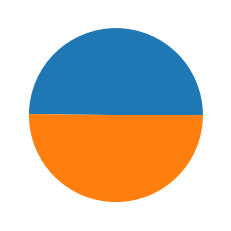

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sexY)
#plt.show()


## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#https://www.youtube.com/watch?v=ojG35FU4G-Y

# Start by getting the last (greatest) timepoint for each mouse
lasttimepoint = mouseclean.groupby(["Mouse ID"]).last()

#mouseregimengroup = mouseclean.groupby(["Drug Regimen"])
lastimetopfour = lasttimepoint.loc[(lasttimepoint["Drug Regimen"]=="Capomulin") | (lasttimepoint["Drug Regimen"]=="Ramicane") | (lasttimepoint["Drug Regimen"]=="Infubinol") | (lasttimepoint["Drug Regimen"]=="Ceftamin") ,:]
lastimetopfour

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#I don't know which "original dataframe" the mean

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,38.407618,1
a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4
y793,Capomulin,Male,17,17,45,31.896238,2
y865,Ceftamin,Male,23,26,45,64.729837,3


In [45]:
# Put treatments into a list for for loop (and later for plot labels)

topfourtreatmentslist = list(lastimetopfour['Drug Regimen'].unique())
print(topfourtreatmentslist)


# Create empty list to fill with tumor vol data (for plotting)
tumorvoldataCapomulin = []
print(tumorvoldataCapomulin)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
Capomulin = pd.DataFrame(lastimetopfour.loc[lastimetopfour["Drug Regimen"]=="Capomulin","Tumor Volume (mm3)"])
Ramicane = pd.DataFrame(lastimetopfour.loc[lastimetopfour["Drug Regimen"]=="Ramicane","Tumor Volume (mm3)"])
Infubinol = pd.DataFrame(lastimetopfour.loc[lastimetopfour["Drug Regimen"]=="Infubinol","Tumor Volume (mm3)"])  
Ceftamin = pd.DataFrame(lastimetopfour.loc[lastimetopfour["Drug Regimen"]=="Ceftamin","Tumor Volume (mm3)"])

#for regime in topfourtreatmentslist
#    for vol in lastimetopfour
#        if Drug Regimen

    # add subset 
        #I don't understand this
    
    
    

['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']
[]


In [57]:
# Determine outliers using upper and lower bounds
    #calculate the quartiles
    
        #Capomulin
quartilesCapomulin = Capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqCapomulin = quartilesCapomulin[0.25]
upperqCapomulin = quartilesCapomulin[0.75]
iqrCapomulin = upperqCapomulin-lowerqCapomulin

print(f"Capomulin's lower quartile of final tumor volume is: {lowerqCapomulin}")
print(f"Capomulin's upper quartile of final tumor volume is: {upperqCapomulin}")
print(f"Capomulin's interquartile range of final tumor volume is: {iqrCapomulin}")
print(f"Capomulin's median of final tumor volume is: {quartilesCapomulin[0.5]} ")
print()

        #Ramicane
quartilesRamicane = Ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqRamicane = quartilesRamicane[0.25]
upperqRamicane = quartilesRamicane[0.75]
iqrRamicane = upperqRamicane-lowerqRamicane

print(f"Ramicane's lower quartile of final tumor volume is: {lowerqRamicane}")
print(f"Ramicane's upper quartile of final tumor volume is: {upperqRamicane}")
print(f"Ramicane's interquartile range of final tumor volume is: {iqrRamicane}")
print(f"Ramicane's median of final tumor volume is: {quartilesRamicane[0.5]} ")
print()

       #Infubinol
quartilesInfubinol = Infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqInfubinol = quartilesInfubinol[0.25]
upperqInfubinol = quartilesInfubinol[0.75]
iqrInfubinol = upperqInfubinol-lowerqInfubinol

print(f"Infubinol's lower quartile of final tumor volume is: {lowerqInfubinol}")
print(f"Infubinol's upper quartile of final tumor volume is: {upperqInfubinol}")
print(f"Infubinol's interquartile range of final tumor volume is: {iqrInfubinol}")
print(f"Infubinol's median of final tumor volume is: {quartilesInfubinol[0.5]} ")
print()

       #Ceftamin
quartilesCeftamin = Ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqCeftamin = quartilesCeftamin[0.25]
upperqCeftamin = quartilesCeftamin[0.75]
iqrCeftamin = upperqCeftamin-lowerqCeftamin

print(f"Ceftamin's lower quartile of final tumor volume is: {lowerqCeftamin}")
print(f"Ceftamin's upper quartile of final tumor volume is: {upperqCeftamin}")
print(f"Ceftamin's interquartile range of final tumor volume is: {iqrCeftamin}")
print(f"Ceftamin's median of final tumor volume is: {quartilesCeftamin[0.5]} ")
print()


Capomulin's lower quartile of final tumor volume is: 32.37735684
Capomulin's upper quartile of final tumor volume is: 40.1592203
Capomulin's interquartile range of final tumor volume is: 7.781863460000004
Capomulin's median of final tumor volume is: 38.125164399999996 

Ramicane's lower quartile of final tumor volume is: 31.56046955
Ramicane's upper quartile of final tumor volume is: 40.65900627
Ramicane's interquartile range of final tumor volume is: 9.098536719999998
Ramicane's median of final tumor volume is: 36.56165229 

Infubinol's lower quartile of final tumor volume is: 54.04860769
Infubinol's upper quartile of final tumor volume is: 65.52574285
Infubinol's interquartile range of final tumor volume is: 11.477135160000003
Infubinol's median of final tumor volume is: 60.16518046 

Ceftamin's lower quartile of final tumor volume is: 48.72207785
Ceftamin's upper quartile of final tumor volume is: 64.29983003
Ceftamin's interquartile range of final tumor volume is: 15.57775217999999

In [63]:
    #Calculate upper and lower bound and therefore outliers
#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")

    #Capomulin
lower_boundCapomulin = lowerqCapomulin - (1.5*iqrCapomulin)
upper_boundCapomulin = upperqCapomulin + (1.5*iqrCapomulin)
print(f"Capomulin's values below {lower_boundCapomulin} could be outliers.")
print(f"Capomulin's values above {upper_boundCapomulin} could be outliers.")
print()

    #Ramicane
lower_boundRamicane = lowerqRamicane - (1.5*iqrRamicane)
upper_boundRamicane = upperqRamicane + (1.5*iqrRamicane)
print(f"Ramicane's values below {lower_boundRamicane} could be outliers.")
print(f"Ramicane's values above {upper_boundRamicane} could be outliers.")
print()

    #Infubinol
lower_boundInfubinol = lowerqInfubinol - (1.5*iqrInfubinol)
upper_boundInfubinol = upperqInfubinol + (1.5*iqrInfubinol)
print(f"Infubinol's values below {lower_boundInfubinol} could be outliers.")
print(f"Infubinol's values above {upper_boundInfubinol} could be outliers.")
print()

    #Ceftamin
lower_boundCeftamin = lowerqCeftamin - (1.5*iqrCeftamin)
upper_boundCeftamin = upperqCeftamin + (1.5*iqrCeftamin)
print(f"Ceftamin's values below {lower_boundCeftamin} could be outliers.")
print(f"Ceftamin's values above {upper_boundCeftamin} could be outliers.")
print()

Capomulin's values below 20.70456164999999 could be outliers.
Capomulin's values above 51.83201549 could be outliers.

Ramicane's values below 17.912664470000003 could be outliers.
Ramicane's values above 54.30681135 could be outliers.

Infubinol's values below 36.83290494999999 could be outliers.
Infubinol's values above 82.74144559000001 could be outliers.

Ceftamin's values below 25.355449580000002 could be outliers.
Ceftamin's values above 87.66645829999999 could be outliers.



In [67]:
    #provide table showing potential outliers
#outlier_occupancy = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
#outlier_occupancy

lasttumorvolumeoutliers = lastimetopfour.loc[(lastimetopfour["Tumor Volume (mm3)"]< lower_boundCapomulin) | (lastimetopfour["Tumor Volume (mm3)"] > upper_boundCapomulin)]

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
